In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')
import os


In [2]:
df = pd.read_csv("./Data/StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
y = df['math score']
X = df.drop('math score', axis=1)

In [8]:
X.shape, y.shape

((1000, 7), (1000,))

Unique Categories

In [20]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if df[col].dtype == 'int64']
for col in cat_col:
    print(f"{col} = \n {df[col].unique()}\n" )


gender = 
 ['female' 'male']

race/ethnicity = 
 ['group B' 'group C' 'group A' 'group D' 'group E']

parental level of education = 
 ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

lunch = 
 ['standard' 'free/reduced']

test preparation course = 
 ['none' 'completed']



In [39]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [31]:
cat_features = X.select_dtypes(include="object").columns  #index of df
num_features = X.select_dtypes(exclude="object").columns

In [30]:
ohe = OneHotEncoder()
ss = StandardScaler()

In [32]:
preprocessor = ColumnTransformer(
    [
        ("One_Hot_Encoder", ohe, cat_features),
        ("Standard_Scaler", ss, num_features)
    ]
)

In [34]:
X = preprocessor.fit_transform(X)

In [38]:
print(type(X))
X.shape

<class 'numpy.ndarray'>


(1000, 19)

In [43]:
#Spliting train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 19), (200, 19), (800,), (200,))

Function of evaluation metrics...

In [66]:
def evaluation_metrics(true, prediction):
    mae = mean_absolute_error(true, prediction)
    mse = mean_squared_error(true, prediction)
    rmse = np.sqrt(mean_squared_error(true, prediction))
    r2 = r2_score(true, prediction)

    return mae, mse, rmse, r2

In [84]:
models = {
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "XGBRegressor": XGBRegressor(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "SVR": SVR(),
    "CatBoostRegressor": CatBoostRegressor()
}


In [ ]:
models_list = []
R2_score_train = []
R2_score_test = []

for n,m in models.items():
    # Model training....
    model = m
    model.fit(X_train, y_train)

    # Prediction....
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Evaluate the model...
    train_mae, train_mse, train_rmse, train_r2 = evaluation_metrics(y_train, prediction=train_pred)
    mae, mse, rmse, r2 = evaluation_metrics(y_test, prediction=test_pred)

    #Storing result in lists...
    models_list.append(n)
    R2_score_train.append(train_r2)
    R2_score_test.append(r2)

    #print("Training Results: \n")
    #print(f"Evaluation metrics for model: {n} \n MAE = {train_mae} \n MSE = {train_mse} \n RMSE = {train_rmse} \n R2_SCORE = {train_r2} \n")
    #print("Test Results: \n")
    #print(f"Evaluation metrics for model: {n} \n MAE = {mae} \n MSE = {mse} \n RMSE = {rmse} \n R2_SCORE = {r2} ")
    #print(64*"=")

In [94]:
df = pd.DataFrame(list(zip(models_list, R2_score_train, R2_score_test)), columns=["Models Name", "R2_score_train", "R2_score_test"])
df.sort_values(by=["R2_score_test"], ascending=False)

,Models Name,R2_score_train,R2_score_test
6,Ridge,0.874304,0.880593
0,LinearRegression,0.874317,0.880433
3,AdaBoostRegressor,0.848469,0.853903
9,CatBoostRegressor,0.958936,0.851632
2,RandomForestRegressor,0.976532,0.848320
4,XGBRegressor,0.995500,0.827797
7,Lasso,0.807146,0.825320
5,KNeighborsRegressor,0.855498,0.783813
1,DecisionTreeRegressor,0.999653,0.735779
8,SVR,0.808128,0.728600


Linear Regression

In [102]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)

# Prediction....
y_pred = lr.predict(X_test)

# Evaluate the model...
score = r2_score(y_test, y_pred)*100
print("Accuracy: %.2f" %score)


Accuracy: 88.04


Text(0, 0.5, 'Predicted')

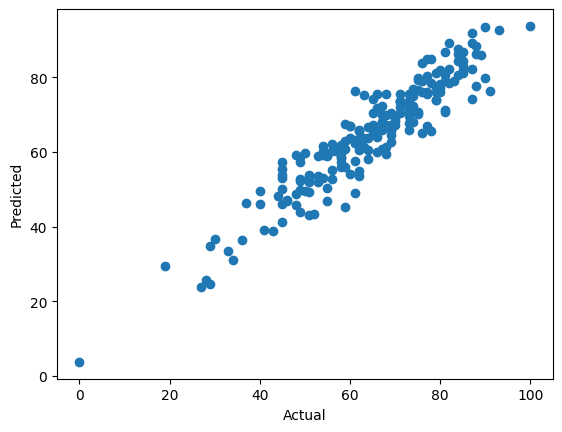

In [103]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

<Axes: xlabel='math score'>

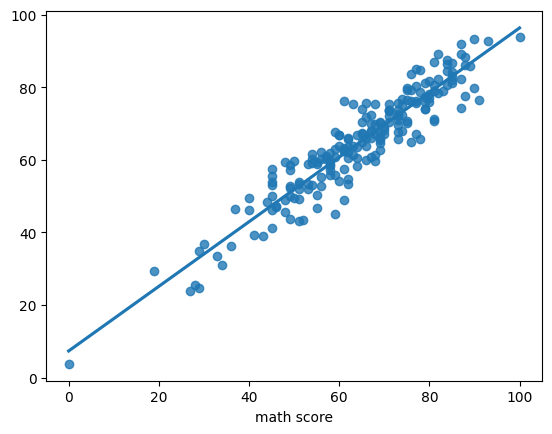

In [105]:
sns.regplot(x=y_test, y=y_pred, ci=None)